# Value at Risk Assessment Model

### Import Packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Distributions - Set Up Stock Parameters

In [7]:
# Number of shares
share_MSFT = 1000

# Live stock price
price = yf.Ticker('MSFT')
price_MSFT = price.history().tail(1)['Close'].iloc[0]

print('  MSFT')
print('----------')
print(price_MSFT)

  MSFT
----------
324.7300109863281


30-day Historical volatility source: https://www.alphaquery.com/stock/MSFT/volatility-option-statistics/30-day/historical-volatility

In [8]:
# Investment value
value_MSFT = price_MSFT * share_MSFT

# Risk free rate (4-week treasury bill rate)
rfr_MSFT = 0.0551

# Volatility (30-day volatility at that time)
vol_MSFT = 0.2996

### Simulations - Calculate Investment Returns

In [15]:
# Number of simulations
simulations = 50000

# Investment time in a year
t_MSFT = 21/252

(array([  2.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,   2.,   1.,   5.,
          3.,   4.,   6.,   6.,  10.,  11.,   6.,   6.,  19.,  19.,  21.,
         17.,  26.,  19.,  31.,  26.,  34.,  37.,  48.,  61.,  49.,  61.,
         69.,  77.,  88.,  93.,  89., 112., 125., 115., 135., 136., 144.,
        150., 176., 129., 149., 146., 159., 133., 146., 144., 157., 130.,
        121., 122., 123., 113., 112., 106., 104.,  84.,  78.,  78.,  78.,
         64.,  49.,  57.,  58.,  43.,  34.,  37.,  38.,  31.,  25.,  15.,
         14.,  11.,  13.,   9.,   7.,   8.,   8.,   3.,   5.,   6.,   0.,
          1.,   3.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,
          1.]),
 array([-3.71457851, -3.63980911, -3.56503971, -3.49027031, -3.4155009 ,
        -3.3407315 , -3.2659621 , -3.1911927 , -3.1164233 , -3.04165389,
        -2.96688449, -2.89211509, -2.81734569, -2.74257628, -2.66780688,
        -2.59303748, -2.51826808, -2.44349868, -2.36872927, -2.29395987,
        -2.21919047, -2.14

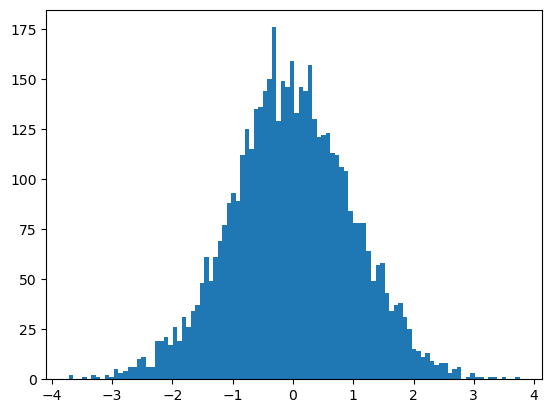

In [11]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample, bins = 100)

In [13]:
print(np.mean(sample))
print(np.std(sample))

-0.02268730070915757
1.0062082297149821


In [17]:
# Create a function to calculate the returns of the investment
def VaR(pv,rfr,vol,t,simulations):
    endvalue = pv*np.exp((rfr - 0.5 * vol**2)* t + np.random.standard_normal(simulations)*vol*np.sqrt(t))
    
    returns = endvalue - pv
    return returns

# Apply the VaR function to simulate the returns
returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

print(returns_MSFT)

[-30039.25881382  -6173.49044399  -3920.22015328 ...  15724.34498938
  26749.89878111  18920.79188194]


### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [18]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.
x=0.9
y = 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x,y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-33,741
VaR at 95% confidence level: $-42,724
VaR at 99% confidence level: $-59,462


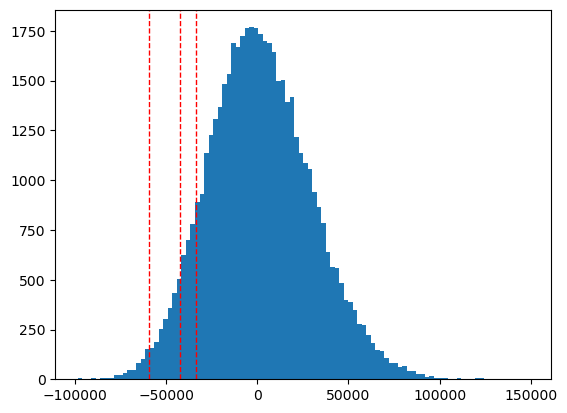

In [21]:
# Plot the returns
plt.hist(returns_MSFT, bins =100)

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence= (100-i)/100
    value=np.percentile(returns_MSFT, i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth = 1)